In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

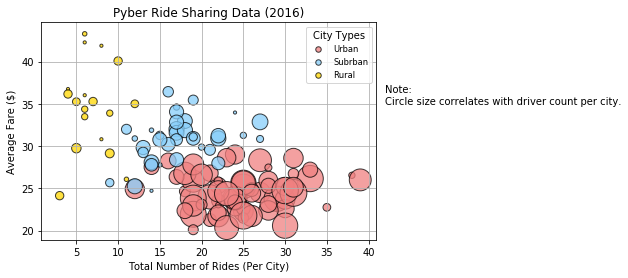

In [2]:
# Obtain the x and y coordinates for each of the three city types

urban = combined_data[(combined_data["type"] == "Urban")]
suburban = combined_data[(combined_data["type"] == "Suburban")]
rural = combined_data[(combined_data["type"] == "Rural")]

urban_x = urban.groupby("city")["ride_id"].count()
urban_y = urban.groupby("city")["fare"].mean()
urban_circle = urban.groupby("city")["driver_count"].mean()

suburban_x = suburban.groupby("city")["ride_id"].count()
suburban_y = suburban.groupby("city")["fare"].mean()
suburban_circle = suburban.groupby("city")["driver_count"].mean()

rural_x = rural.groupby("city")["ride_id"].count()
rural_y = rural.groupby("city")["fare"].mean()
rural_circle = rural.groupby("city")["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, s=urban_circle*10, c="lightcoral", 
            alpha=0.75, linewidths=1, edgecolor="black",
            marker="o", label="Urban")

plt.scatter(suburban_x, suburban_y, s=suburban_circle*10, c="lightskyblue", 
            alpha=0.75, linewidths=1, edgecolor="black",
            marker="o", label="Subrban")

plt.scatter(rural_x, rural_y, s=rural_circle*10, c="gold",
            alpha=0.75, linewidths=1, edgecolor="black",
            marker="o", label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Create a legend
lgnd = plt.legend(loc="best", title="City Types", fontsize="small")

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("ride_sharing_scatter.png")

# Show plot
plt.show()

## Total Fares by City Type

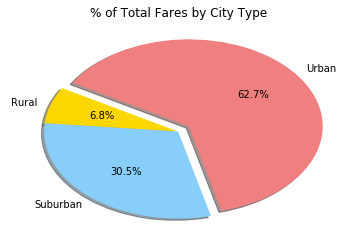

In [3]:
# Calculate Type Percents
total_fares = combined_data.groupby("type")["fare"].sum() / combined_data["fare"].sum() * 100

# Build Pie Chart
plt.pie(total_fares, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=150, explode=[0, 0, 0.1])

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("total_fares_pie.png")

# Show Figure
plt.show()

## Total Rides by City Type

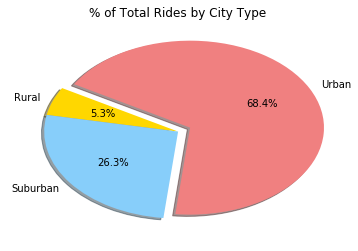

In [4]:
# Calculate Ride Percents
total_rides = combined_data.groupby("type")["ride_id"].count() / combined_data["ride_id"].count() * 100

# Build Pie Chart
plt.pie(total_rides, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=150, explode=[0, 0, 0.1])

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("total_rides_pie.png")

# Show Figure
plt.show()

## Total Drivers by City Type

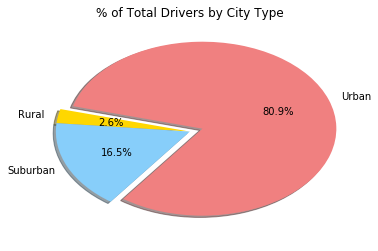

In [5]:
# Calculate Driver Percents
total_drivers = city_data.groupby("type")["driver_count"].sum() / city_data["driver_count"].sum() * 100

# Build Pie Charts
plt.pie(total_drivers, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=165, explode=[0, 0, 0.1])

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("total_drivers_pie.png")

# Show Figure
plt.show()